## PHYS-85200 - Machine Learning for Physicists
### Student: Gehan Ranepura
### Worksheet #3

In [1]:
import pandas as pd
import numpy as np
import sklearn.tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.model_selection import KFold, StratifiedKFold

from scipy import stats

from io import StringIO  
from IPython.display import Image  
import pydotplus

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
font = {'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
matplotlib.rcParams['figure.dpi'] = 300

In [4]:
df = pd.read_csv('phl_exoplanet_catalog.csv', sep = ',')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
df.head()

,P_NAME,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,P_PERIOD,P_PERIOD_ERROR_MIN,P_PERIOD_ERROR_MAX,P_SEMI_MAJOR_AXIS,P_SEMI_MAJOR_AXIS_ERROR_MIN,P_SEMI_MAJOR_AXIS_ERROR_MAX,P_ECCENTRICITY,P_ECCENTRICITY_ERROR_MIN,P_ECCENTRICITY_ERROR_MAX,P_INCLINATION,P_INCLINATION_ERROR_MIN,P_INCLINATION_ERROR_MAX,P_OMEGA,P_OMEGA_ERROR_MIN,P_OMEGA_ERROR_MAX,P_TPERI,P_TPERI_ERROR_MIN,P_TPERI_ERROR_MAX,P_ANGULAR_DISTANCE,P_IMPACT_PARAMETER,P_IMPACT_PARAMETER_ERROR_MIN,P_IMPACT_PARAMETER_ERROR_MAX,P_TEMP_MEASURED,P_GEO_ALBEDO,P_GEO_ALBEDO_ERROR_MIN,P_GEO_ALBEDO_ERROR_MAX,P_DETECTION,P_DETECTION_MASS,P_DETECTION_RADIUS,P_ALT_NAMES,P_ATMOSPHERE,S_NAME,S_RA,S_DEC,S_MAG,S_DISTANCE,S_DISTANCE_ERROR_MIN,S_DISTANCE_ERROR_MAX,S_METALLICITY,S_METALLICITY_ERROR_MIN,S_METALLICITY_ERROR_MAX,S_MASS,S_MASS_ERROR_MIN,S_MASS_ERROR_MAX,S_RADIUS,S_RADIUS_ERROR_MIN,S_RADIUS_ERROR_MAX,S_TYPE,S_AGE,S_AGE_ERROR_MIN,S_AGE_ERROR_MAX,S_TEMPERATURE,S_TEMPERATURE_ERROR_MIN,S_TEMPERATURE_ERROR_MAX,S_DISC,S_MAGNETIC_FIELD,S_LOG_G,S_ALT_NAMES,P_ESCAPE,P_POTENTIAL,P_GRAVITY,P_DENSITY,P_HILL_SPHERE,P_DISTANCE,P_PERIASTRON,P_APASTRON,P_DISTANCE_EFF,P_FLUX,P_FLUX_MIN,P_FLUX_MAX,P_TEMP_EQUIL,P_TEMP_EQUIL_MIN,P_TEMP_EQUIL_MAX,P_TYPE,S_RADIUS_EST,S_TYPE_TEMP,S_RA_H,S_RA_T,S_DEC_T,S_LUMINOSITY,S_HZ_OPT_MIN,S_HZ_OPT_MAX,S_HZ_CON_MIN,S_HZ_CON_MAX,S_HZ_CON0_MIN,S_HZ_CON0_MAX,S_HZ_CON1_MIN,S_HZ_CON1_MAX,S_SNOW_LINE,S_ABIO_ZONE,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,11 Com b,3.0,6165.86330,-476.74200,476.74200,NaN,NaN,NaN,2007,2014-05-14,326.03000,-0.32,0.32,1.29,-0.05,0.05,0.231,-0.005,0.005,NaN,NaN,NaN,94.8,-1.5,1.5,2452899.6,-1.6,1.6,13.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Radial Velocity,NaN,NaN,NaN,NaN,11 Com,185.17928,17.792868,4.740,93.37,-1.92,1.92,-0.35,-0.09,0.09,2.70,-0.30,0.30,19.00,-2.00,2.00,K0 III,NaN,NaN,NaN,4742.0,-100.0,100.0,NaN,NaN,2.31,"HD 107383, HIP 60202",NaN,NaN,NaN,NaN,0.130671,1.324418,0.99201,1.58799,1.298759,101.011410,64.855456,166.191940,799.44963,722.98875,914.73942,Jovian,19.00,K,12.345286,12 20 43.0286,+17 47 34.3248,163.546800,10.132812,24.763411,12.834754,23.477907,13.586847,23.477907,12.390643,23.477907,34.529063,0.476460,0.642400,0,0,Hot,0,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709,6165.86330,1.29
1,11 UMi b,3.0,4684.78480,-794.57001,794.57001,NaN,NaN,NaN,2009,2018-09-06,516.21997,-3.20,3.20,1.53,-0.07,0.07,0.080,-0.030,0.030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Radial Velocity,NaN,NaN,NaN,NaN,11 UMi,229.27454,71.823898,5.016,125.72,-1.97,1.97,-0.02,NaN,NaN,2.78,-0.69,0.69,29.79,-2.84,2.84,K4 III,NaN,NaN,NaN,4213.0,-46.0,46.0,NaN,NaN,1.93,"HD 136726, HIP 74793",NaN,NaN,NaN,NaN,0.167551,1.534896,1.40760,1.65240,1.531227,107.351180,91.741348,126.426170,819.07569,788.47184,854.28770,Jovian,29.79,K,15.284970,15 17 05.8915,+71 49 26.0328,250.492940,12.770059,31.984271,16.175280,30.323783,17.134143,30.323783,15.615215,30.323783,42.732816,0.193891,0.648683,0,0,Hot,0,0.082414,Ursa Minor,UMi,Little Bear,12.229641,4684.78480,1.53
2,14 And b,3.0,1525.57440,NaN,NaN,NaN,NaN,NaN,2008,2014-05-14,185.84000,-0.23,0.23,0.83,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,2452861.4,-1.5,1.5,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Radial Velocity,NaN,NaN,NaN,NaN,14 And,352.82257,39.236198,5.227,75.59,-0.71,0.71,-0.24,-0.03,0.03,2.20,-0.20,0.10,11.00,-1.00,1.00,G8 III,NaN,NaN,NaN,4813.0,-20.0,20.0,NaN,NaN,2.63,"HD 221345, HIP 116076",NaN,NaN,NaN,NaN,0.073485,0.830000,0.83000,0.83000,0.830000,84.446427,84.446427,84.446427,772.30746,772.30746,772.30746,Jovian,11.00,G,23.521506,23 31 17.4215,+39 14 10.3128,58.175144,6.025230,14.680087,7.631867,13.918028,8.078404,13.918028,7.367780,13.918028,20.593611,0.502752,0.600010,0,0,Hot,0,0.081917,Andromeda,And,Andromeda,12.848516,1525.57440,0.83
3,14 Her b,3.0,1481.07850,-47.67420,47.67420,NaN,NaN,NaN,200

In [5]:
# Drop label column
bindf = df.drop('P_HABITABLE', axis = 1)
print(bindf)

#bindf['P_HABITABLE'] = bindf['P_HABITABLE'].astype(int) #creating a new label column and casting it as integer
bindf['P_HABITABLE'] = (np.logical_or((df.P_HABITABLE == 1) , (df.P_HABITABLE == 2))).astype(int)
bindf['P_HABITABLE'].head()

final_feature = bindf[['S_MASS', 'P_PERIOD', 'P_DISTANCE']] 
targets = bindf.P_HABITABLE
final_feature.head()

          P_NAME  P_STATUS      P_MASS  P_MASS_ERROR_MIN  P_MASS_ERROR_MAX  \
0       11 Com b       3.0  6165.86330        -476.74200         476.74200   
1       11 UMi b       3.0  4684.78480        -794.57001         794.57001   
2       14 And b       3.0  1525.57440               NaN               NaN   
3       14 Her b       3.0  1481.07850         -47.67420          47.67420   
4     16 Cyg B b       3.0   565.73385         -25.42624          25.42624   
...          ...       ...         ...               ...               ...   
4043    K2-296 b       3.0         NaN               NaN               NaN   
4044    K2-296 c       3.0         NaN               NaN               NaN   
4045   GJ 1061 b       3.0     1.38000           0.15000           0.16000   
4046   GJ 1061 c       3.0     1.75000           0.23000           0.23000   
4047   GJ 1061 d       3.0     1.68000           0.24000           0.25000   

      P_RADIUS  P_RADIUS_ERROR_MIN  P_RADIUS_ERROR_MAX  P_YEAR 

,S_MASS,P_PERIOD,P_DISTANCE
0,2.70,326.03000,1.324418
1,2.78,516.21997,1.534896
2,2.20,185.84000,0.830000
3,0.90,1773.40000,3.130558
4,1.08,798.50000,2.043792


In [554]:
# Look at stats of your data
print(final_feature.shape)
final_feature.describe()

(4048, 3)


,S_MASS,P_PERIOD,P_DISTANCE
count,3283.000000,3.938000e+03,3978.000000
mean,1.003838,2.309342e+03,4.047677
std,0.652903,1.167012e+05,62.435994
min,0.010000,9.070629e-02,0.004408
25%,0.810000,4.497336e+00,0.053110
50%,0.970000,1.187053e+01,0.103000
75%,1.130000,4.186661e+01,0.263415
max,23.560000,7.300000e+06,2500.000000


In [555]:
# Count Missing data
print(final_feature.isnull().sum()) #can also use .isna

# Gets rid of any instance with at least one NaN in any column
final_features = final_feature.dropna(axis = 0)
print(final_features.shape)
final_features.describe()

S_MASS        765
P_PERIOD      110
P_DISTANCE     70
dtype: int64
(3180, 3)


,S_MASS,P_PERIOD,P_DISTANCE
count,3180.000000,3.180000e+03,3180.000000
mean,1.018217,2.763531e+03,0.677663
std,0.649450,1.298246e+05,5.962161
min,0.020000,9.070629e-02,0.004408
25%,0.820000,4.175797e+00,0.050453
50%,0.970000,1.155546e+01,0.097369
75%,1.130000,5.474041e+01,0.274581
max,23.560000,7.300000e+06,243.000000


#### 1. In the notebook I posted, I use the "zscore" trick, which eliminates objects with values that are more than 5 sigma away from the mean. 
#### Do the same, but using the median as reference (eliminate objects that are more than 5 sigma away from the median; you can do it one column at a time if you prefer). Does the final size of your data set change?

- Yes it does, 12 outliers are removed so the final size of the dataser changes!

In [558]:
# This eliminates > 5 sigma outliers; however it counts from the mean so it might not be ideal
# final_features = final_features[(np.abs(stats.zscore(final_features)) < 5).all(axis=1)] 

# This eliminates > 5 sigma outliers couting from the median for each column
# Loop through each column
final_features = final_feature.dropna(axis = 0)
targets = targets[final_features.index]
new_features = final_features
new_targets  = targets 
for col in new_features.columns:
    # calculate the median and standard deviation of the column
    col_median = new_features[col].median()
    col_std    = new_features[col].std()
    print("col= {}, col_median = {}, col_std = {}".format(col, col_median, col_std))
    
    # filter the column to keep only values within 5 standard deviations away from the median
    new_features[col] = new_features[col][(new_features[col] >= col_median - 5*col_std) & 
                                          (new_features[col] <= col_median + 5*col_std)]
    new_features.dropna(inplace=True)

# Find targets associated with new dataframe
new_targets = new_targets[new_features.index]

# Reset the index
new_features = new_features.reset_index(drop=True)
new_targets  = new_targets.reset_index(drop=True)
print(new_features.shape)
print(new_targets.shape)

col= S_MASS, col_median = 0.97, col_std = 0.649449718354174
col= P_PERIOD, col_median = 11.5510025, col_std = 129988.18741784335
col= P_DISTANCE, col_median = 0.0968, col_std = 4.137245420024707
(3168, 3)
(3168,)


/var/folders/zn/wknmd3793w1b08wgws1qx64m0000gp/T/ipykernel_12684/2626605817.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_features[col] = new_features[col][(new_features[col] >= col_median - 5*col_std) &
/var/folders/zn/wknmd3793w1b08wgws1qx64m0000gp/T/ipykernel_12684/2626605817.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_features.dropna(inplace=True)


#### 2. Implement 5-fold cross validation (don't forget to use a method that shuffles your splits!) for the kNN algorithm, using recall as your scoring parameter, first without and then with scaling. Do the results change?

- Without scaling both the train and test score are really small ~ 0
- When using scaling (Robust Scaler) the train score = 0.515 and test score = 0.217

In [559]:
Xtrain, Xtest, ytrain, ytest = train_test_split(new_features, new_targets, random_state=2)
print(Xtrain.shape, Xtest.shape)
print(ytrain.shape, ytest.shape)

# This is the standard version. Important: it doesn't shuffle the data, 
# So if your positive examples are all at the beginning or all the end, it might lead to disastrous results.

cv1 = KFold(n_splits = 5)

# This is v2: shuffling added (recommended!)

cv2 = KFold(shuffle = True, n_splits = 5, random_state=5)

# STRATIFICATION ensures that the class distributions in each split resembles those of the 
# entire data set 

cv3 = StratifiedKFold(shuffle = True, n_splits = 5, random_state=5)


for train, test in cv3.split(new_features, new_targets): # One random selection
    print('train -  {}   |   test -  {}'.format(np.bincount(new_targets.loc[train]), 
                                                np.bincount(new_targets.loc[test])))

(2376, 3) (792, 3)
(2376,) (792,)
train -  [2492   42]   |   test -  [624  10]
train -  [2493   41]   |   test -  [623  11]
train -  [2493   41]   |   test -  [623  11]
train -  [2493   42]   |   test -  [623  10]
train -  [2493   42]   |   test -  [623  10]


# kNN without Scaling

In [560]:
# Employ kNN algorithm without scaling
N = new_features.shape[0]
kNN = KNeighborsClassifier(n_neighbors = 5)
#kNN = neighbors.KNeighborsClassifier(n_neighbors = k)
#neighbors.KNeighborsClassifier?

scores3_train = cross_validate(kNN, new_features, new_targets, cv = cv3, scoring = 'recall', return_train_score = True)
scores3       = cross_validate(kNN, new_features, new_targets, cv = cv3, scoring = 'recall')
print("train_score = {:.3f}".format(scores3_train['train_score'].mean()), "train_score_StDev = {:.3f}".format(scores3_train['train_score'].std()))
print("test_score  = {:.3f}".format(scores3['test_score'].mean()),        "test_score_StDev = {:.3f}".format(scores3['test_score'].std()))

/Users/granepura/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/granepura/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

train_score = 0.010 train_score_StDev = 0.019
test_score  = 0.000 test_score_StDev = 0.000


/Users/granepura/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/granepura/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

# kNN with Scaling (Robust)

In [564]:
# Employ kNN algorithm with scaling
N = new_features.shape[0]
kNN = KNeighborsClassifier(n_neighbors = 5)
piped_model = make_pipeline(RobustScaler(), kNN) 

scores3_train = cross_validate(piped_model, new_features, new_targets, cv = cv3, scoring = 'recall', return_train_score = True)
scores3       = cross_validate(piped_model, new_features, new_targets, cv = cv3, scoring = 'recall')
print("train_score = {:.3f}".format(scores3_train['train_score'].mean()), "train_score_StDev = {:.3f}".format(scores3_train['train_score'].std()))
print("test_score  = {:.3f}".format(scores3['test_score'].mean()),        "test_score_StDev = {:.3f}".format(scores3['test_score'].std()))

/Users/granepura/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/granepura/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

train_score = 0.515 train_score_StDev = 0.065
test_score  = 0.247 test_score_StDev = 0.200


#### 3. Try using the StandardScaler and the RobustScaler (both available in sklearn.preprocessing module) to scale the features. Does this make a difference? Which one would you recommend using for this case?

- Robust Scaler   --> train score = 0.515 +/- 0.065 and test score = 0.247 +/- 0.2
- Standard Scaler --> train score = 0.494 +/- 0.068 and test score = 0.171 +/- 0.065

I would use Standard Scaler because although the Robust Scaler gives a better test score (slightly better training score too), the StandardScaler has much smaller standard deviation for the test score.

# kNN with Scaling (Standard)

In [563]:
# Employ kNN algorithm with Standard scaling
N = new_features.shape[0]
kNN = KNeighborsClassifier(n_neighbors = 5)
piped_model = make_pipeline(StandardScaler(), kNN) 

scores3_train = cross_validate(piped_model, new_features, new_targets, cv = cv3, scoring = 'recall', return_train_score = True)
scores3       = cross_validate(piped_model, new_features, new_targets, cv = cv3, scoring = 'recall')
print("train_score = {:.3f}".format(scores3_train['train_score'].mean()), "train_score_StDev = {:.3f}".format(scores3_train['train_score'].std()))
print("test_score  = {:.3f}".format(scores3['test_score'].mean()),        "test score StDev = {:.3f}".format(scores3['test_score'].std()))

/Users/granepura/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/granepura/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

train_score = 0.495 train_score_StDev = 0.068
test_score  = 0.171 test score StDev = 0.065


/Users/granepura/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/granepura/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

#### 4. Calculate the train and test scores for your "best" model (choosing between scaled and unscaled, and if scaled, Robust/Standard).
#### Based on these results, would you say your model suffers from high bias or high variance? Don't forget to justify your answer!

- Robust Scaler   --> train score = 0.515 +/- 0.065 and test score = 0.247 +/- 0.2
- Standard Scaler --> train score = 0.494 +/- 0.068 and test score = 0.171 +/- 0.065

I would use Standard Scaler because although the Robust Scaler gives me a better test score (slightly better training score too), the StandardScaler has much smaller standard deviation for the test score.

- There is high variance because the test score and training score are off significantly over the standard deviation.

In [477]:
# Employ kNN algorithm with scaling
N = new_features.shape[0]
kNN = KNeighborsClassifier(n_neighbors = 5)
piped_model = make_pipeline(StandardScaler(), kNN) 

scores3_train = cross_validate(piped_model, new_features, new_targets, cv = cv3, scoring = 'recall', return_train_score = True)
scores3       = cross_validate(piped_model, new_features, new_targets, cv = cv3, scoring = 'recall')
print("train_score = {:.3f}".format(scores3_train['train_score'].mean()), "train_score_StDev = {:.3f}".format(scores3_train['train_score'].std()))
print("test_score  = {:.3f}".format(scores3['test_score'].mean()),        "test score StDev = {:.3f}".format(scores3['test_score'].std()))

/Users/granepura/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/granepura/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

train_score = 0.495 train_score_StDev = 0.068
test_score  = 0.171 test score StDev = 0.065


/Users/granepura/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


#### 5. Plot the learning curves for your data set. Do your results indicate that collecting more data would be beneficial? Why?

- Yes because the curves are still far from each other even at the max training set data used here, so it suggests more data would be beneficial.

In [457]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=5,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), scoring = 'accuracy'):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure(figsize=(10,6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel(str(scoring))
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Test score from cross-validation")

    plt.legend(loc="best")
    return plt

## LearningCurve RobustScalar k = 5

/Users/granepura/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/granepura/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

/Users/granepura/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/granepura/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

/Users/granepura/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/granepura/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

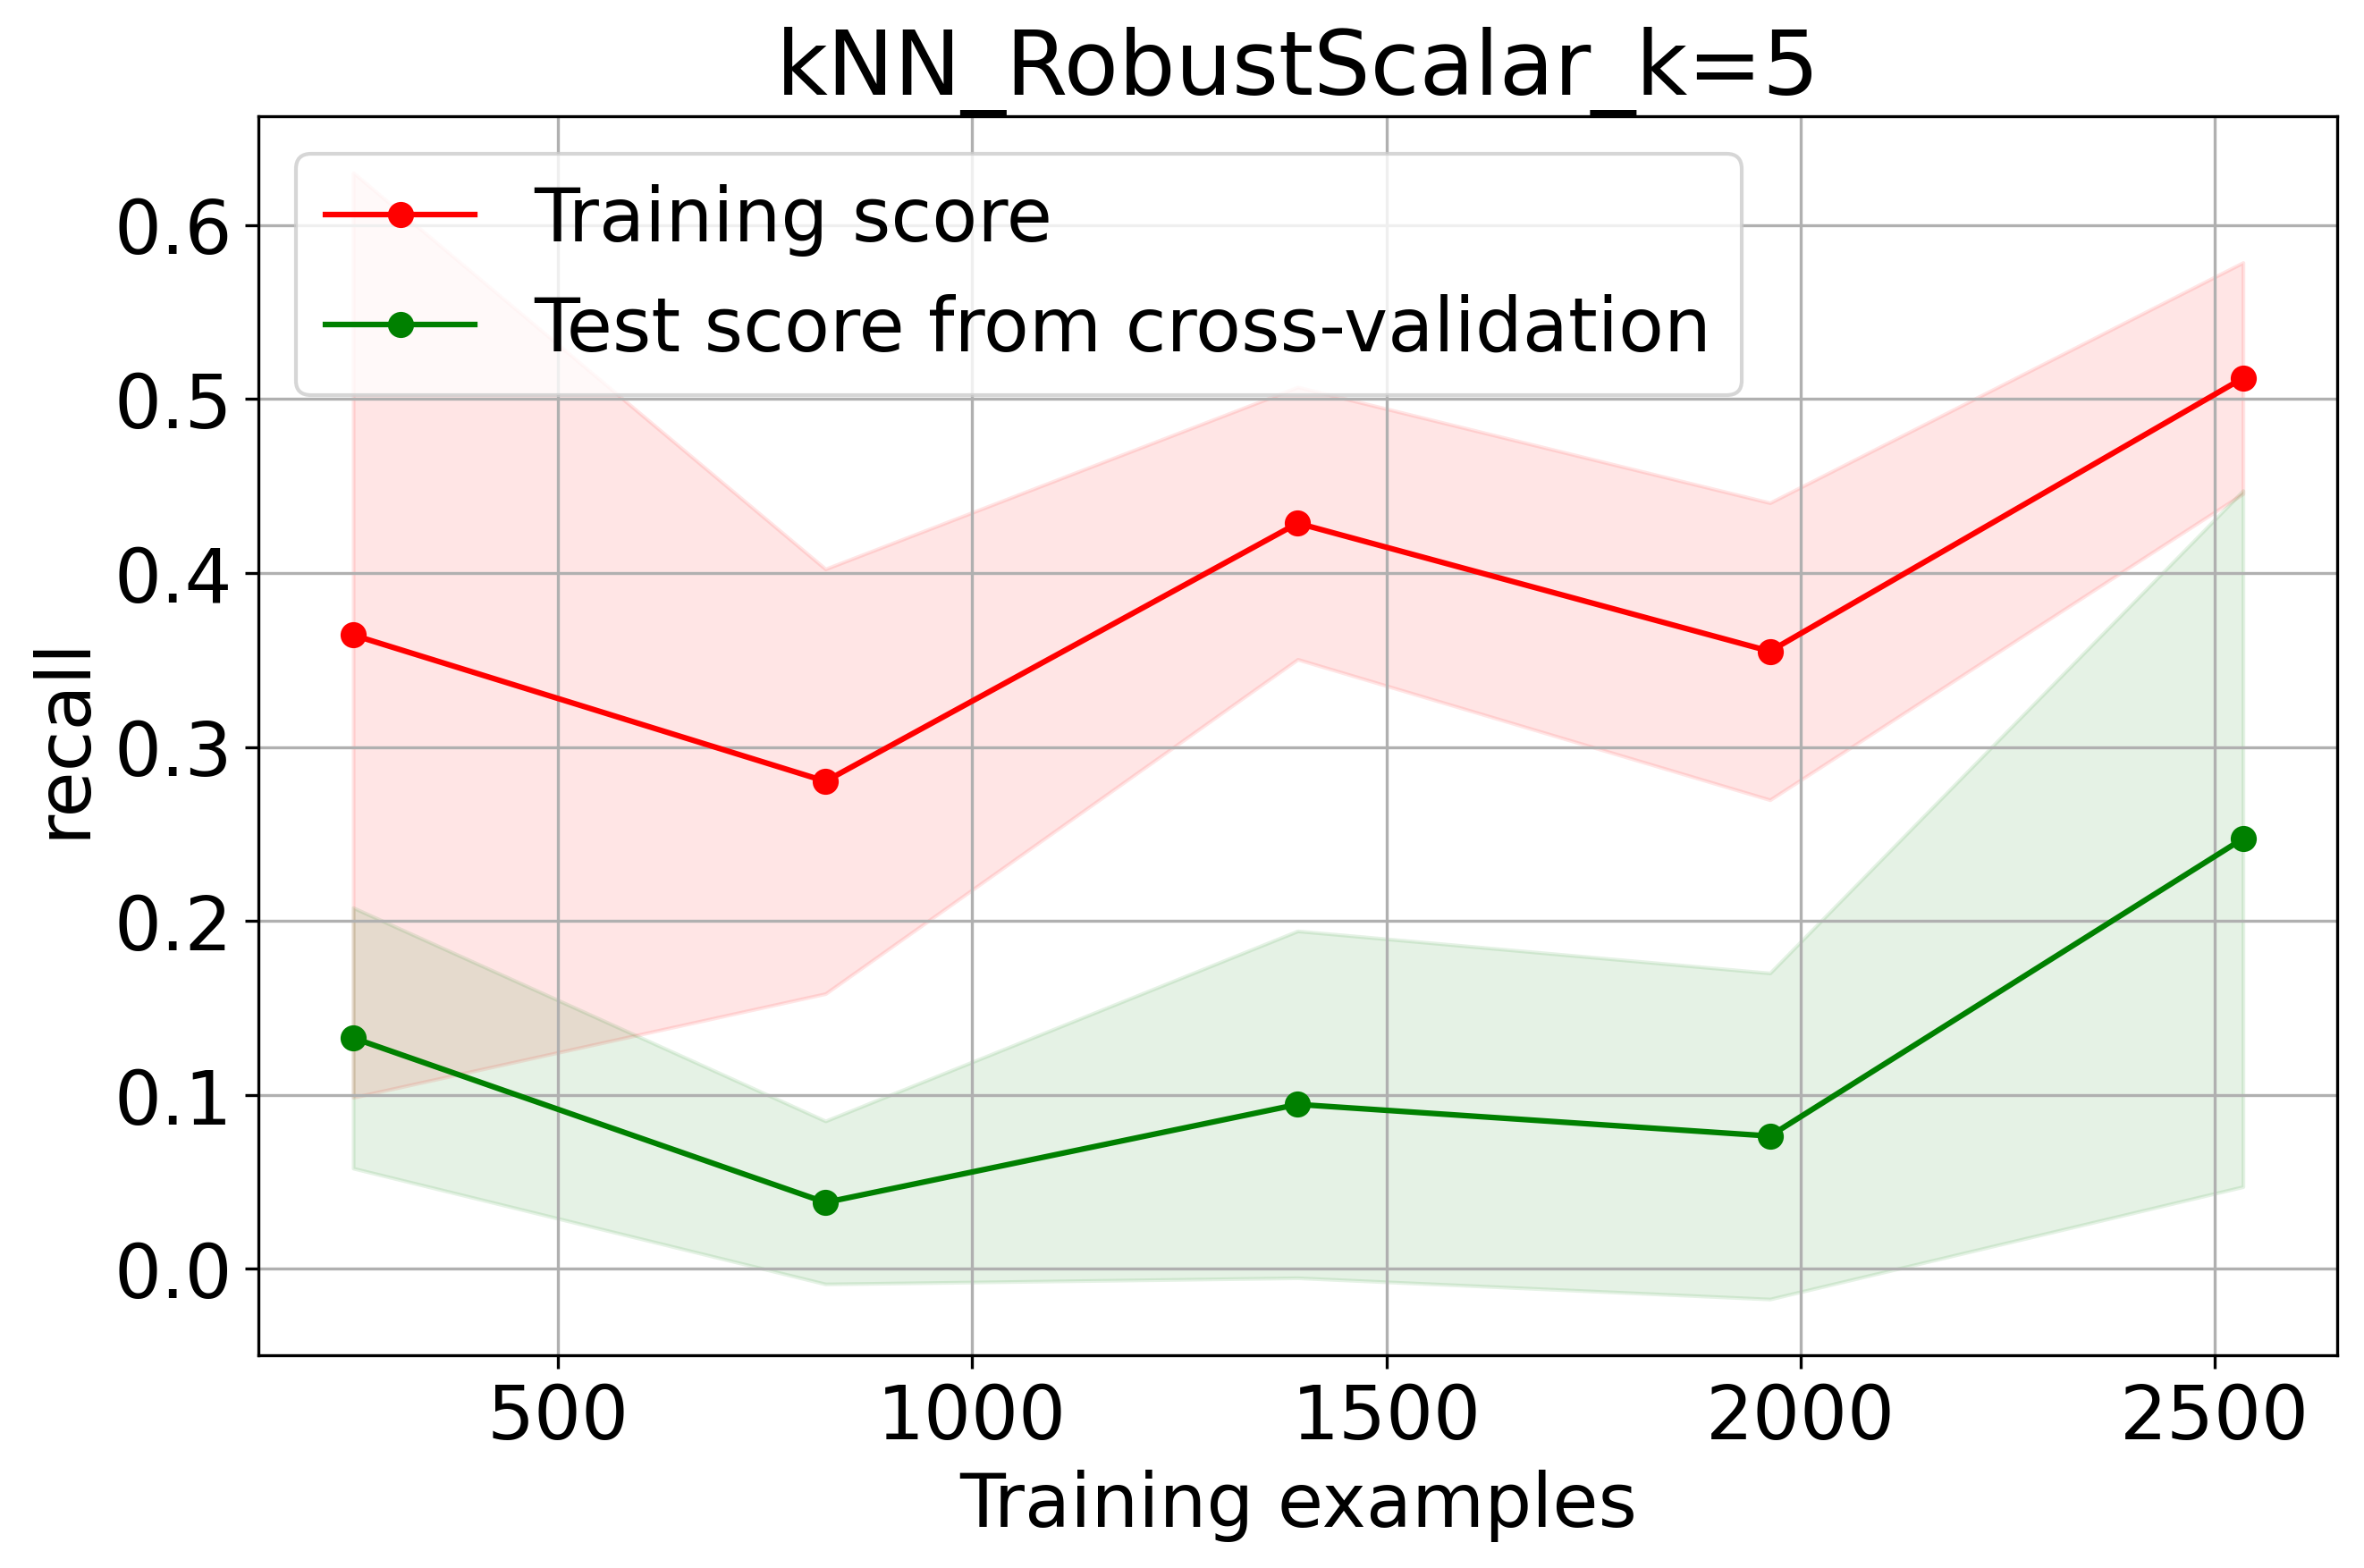

In [481]:
kNN = KNeighborsClassifier(n_neighbors = 5)
piped_model = make_pipeline(RobustScaler(), kNN) 
plot_learning_curve(piped_model, 'kNN_RobustScalar_k=5', new_features, new_targets,  cv = cv3, scoring = 'recall');

## LearningCurve StandardScalar k = 5

/Users/granepura/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/granepura/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

/Users/granepura/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/granepura/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

/Users/granepura/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/granepura/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

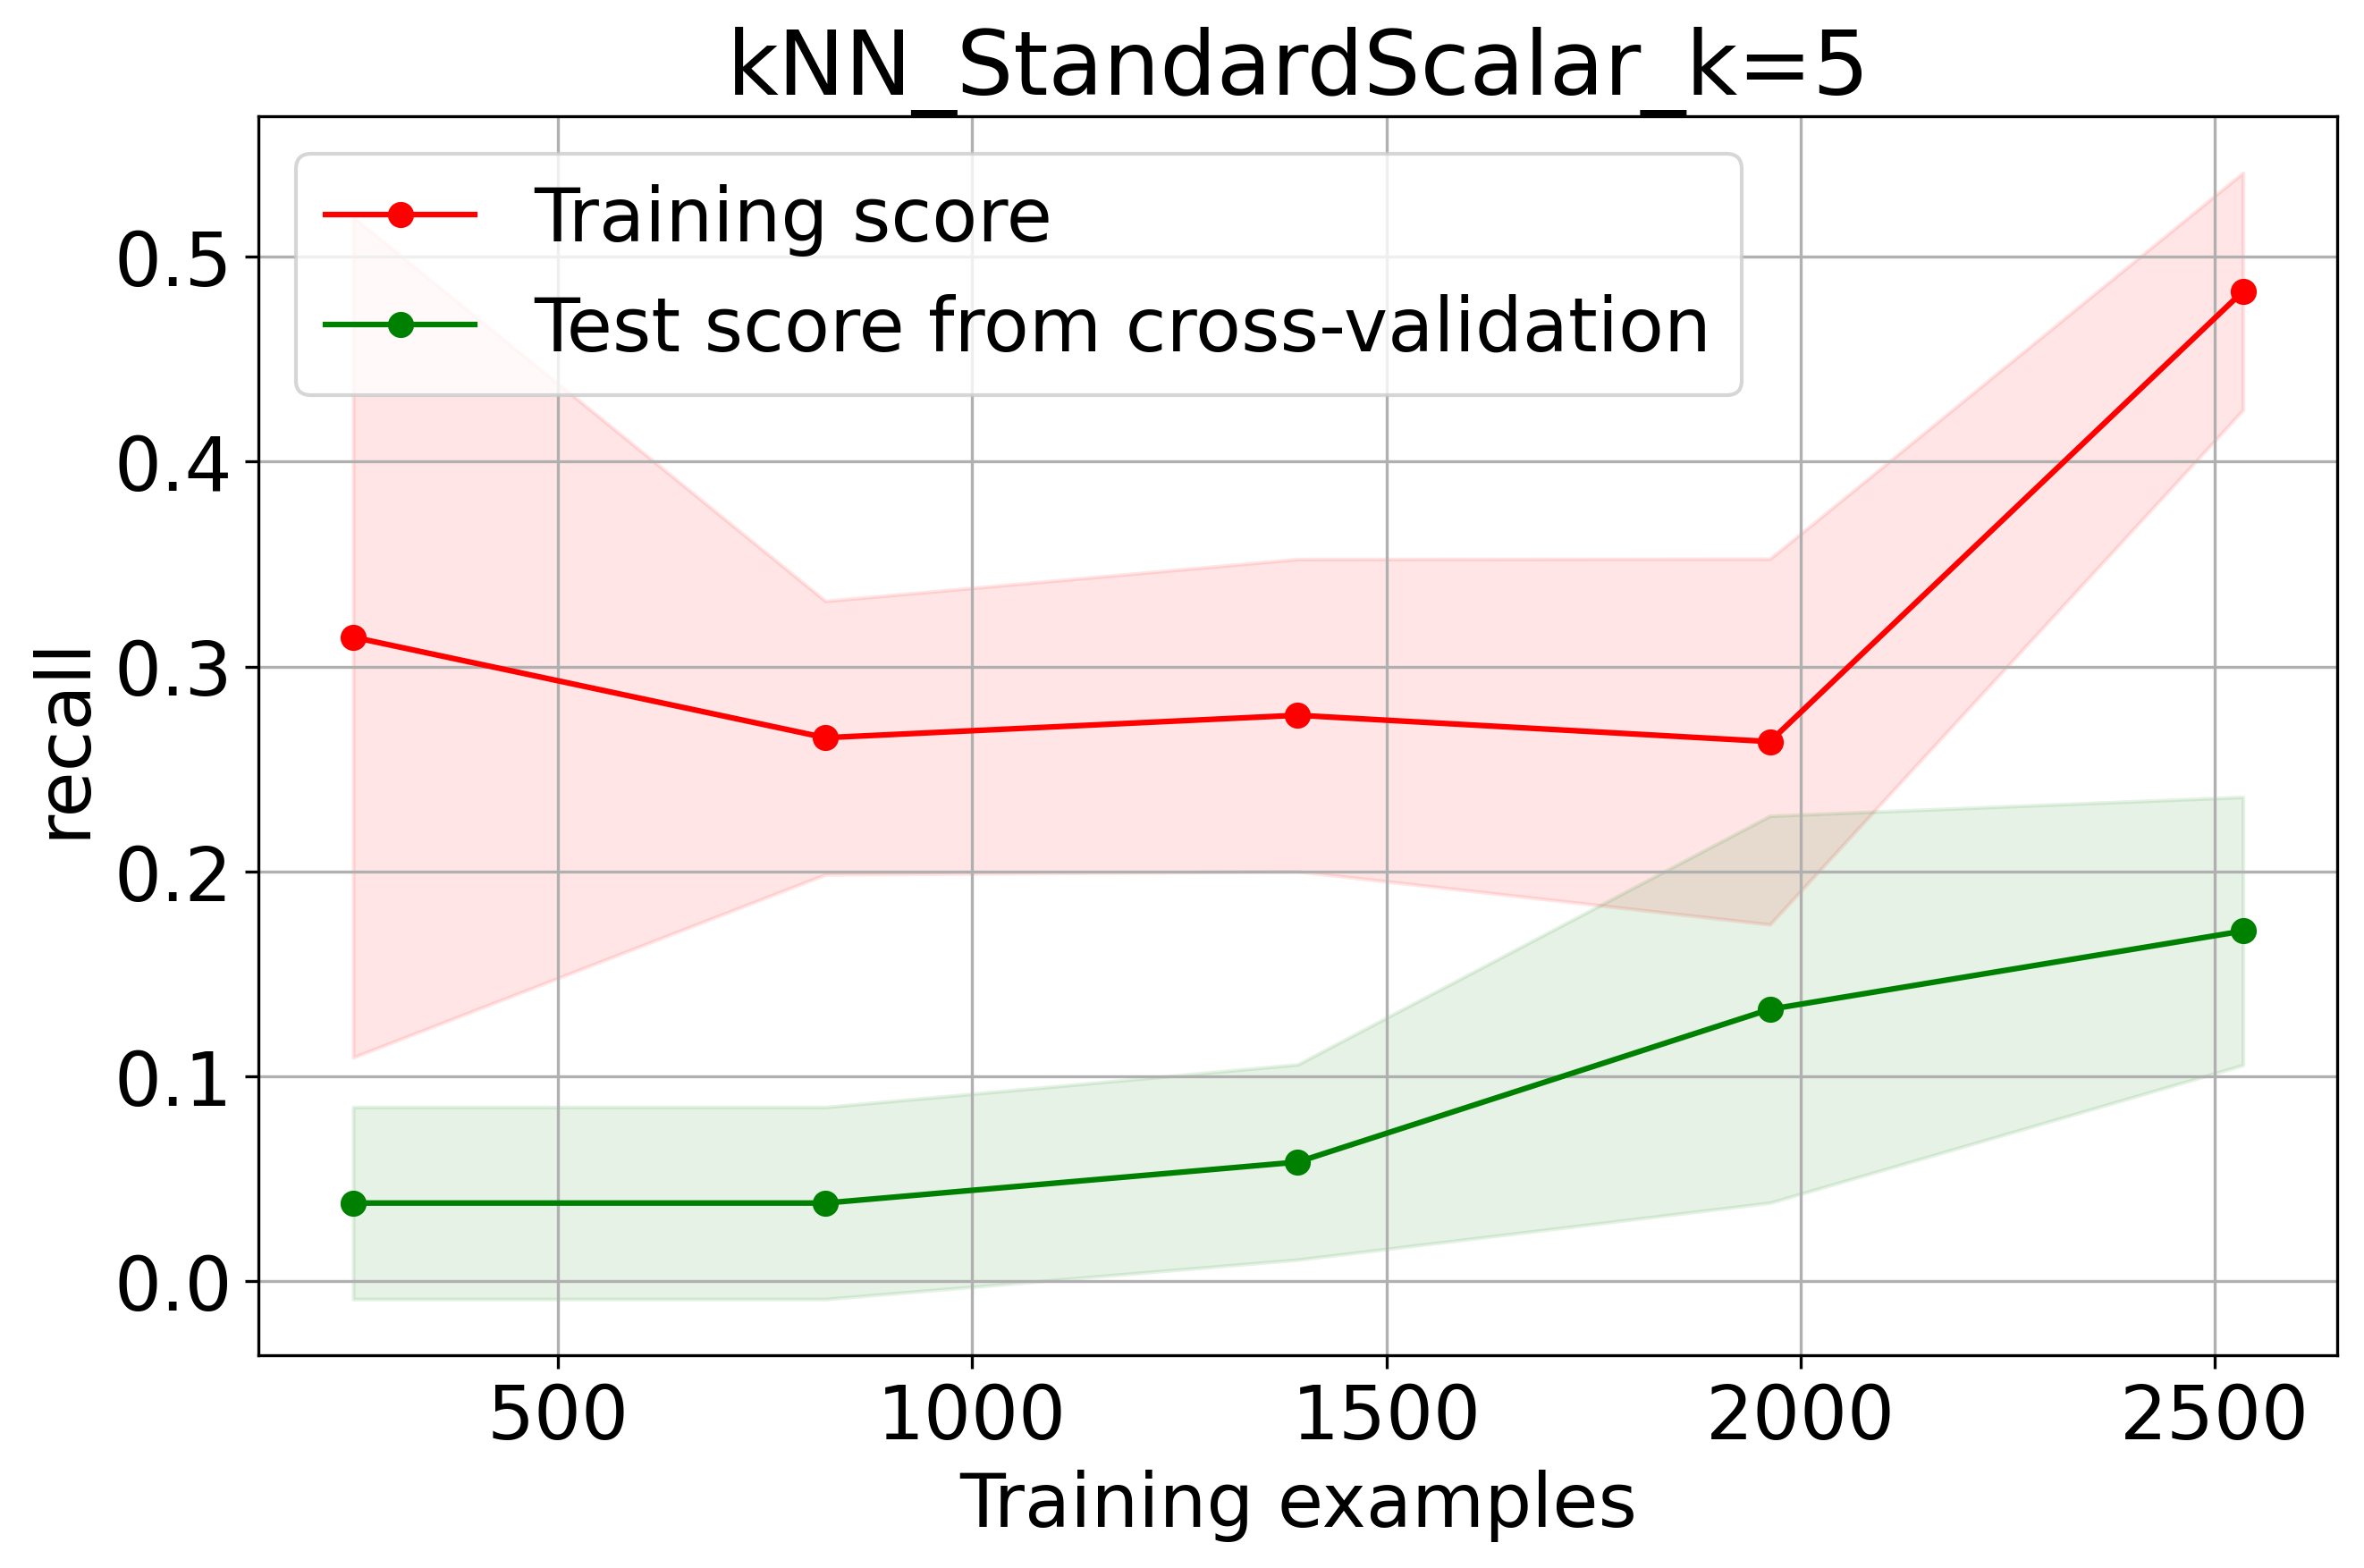

In [480]:
kNN = KNeighborsClassifier(n_neighbors = 5)
piped_model = make_pipeline(StandardScaler(), kNN) 
plot_learning_curve(piped_model, 'kNN_StandardScalar_k=5', new_features, new_targets,  cv = cv3, scoring = 'recall');

#### 6. (no coding) Based on your knowledge about the laws of Physics (in particular, the scaling of stellar luminosity as a function of mass for main sequence stars and the scaling of flux from a point source with distance), engineer a new feature (a combination of 2 or more features you already have) that might correlate strongly with planet habitability. Explain why you think this would work.

I will be using the S_LUMINOSITY and P_FLUX columns in the dataframe and multiply each other, because this product 
will allow ample light to be shining toward the planet. Too much or too little light can be correlated to if the plantet can be habitable or not for life.

#### 7. Add your new feature to the data frame and re-build your model - do the results improve?
- OLD Standard Scaler     --> train score = 0.494 +/- 0.068 and test score = 0.171 +/- 0.065
- REBUILT Standard Scaler --> train_score = 0.573 +/- 0.078 and test_score = 0.372 +/- 0.181

The training score and test score both improved!
- However, the uncertianty for the test score got worse
- The variance in the dataset decreased 

In [524]:
# Drop label column
bindff = df.drop('P_HABITABLE', axis = 1)

#bindf['P_HABITABLE'] = bindf['P_HABITABLE'].astype(int) #creating a new label column and casting it as integer
bindff['P_HABITABLE'] = (np.logical_or((df.P_HABITABLE == 1) , (df.P_HABITABLE == 2))).astype(int)
bindff = bindff[['S_MASS', 'P_PERIOD', 'P_DISTANCE', 'P_ANGULAR_DISTANCE', 'S_LUMINOSITY','P_FLUX' ,'P_HABITABLE']] 
bindff = bindff.dropna(axis = 0)
bindff["LUMFLUX"] =  bindff['S_LUMINOSITY'] * bindff['P_FLUX']

LF_feature = bindff[['S_MASS', 'P_PERIOD', 'P_DISTANCE', 'LUMFLUX']] 
LF_target = bindff.P_HABITABLE
print(LF_feature.shape)
print(LF_target.shape)

(1454, 4)
(1454,)


In [520]:
# Look at stats of your data
LF_feature.describe()

(1454, 4)


,S_MASS,P_PERIOD,P_DISTANCE,LUMFLUX
count,1454.000000,1.454000e+03,1454.000000,1.454000e+03
mean,1.049105,5.514869e+03,1.010202,2.073144e+04
std,0.694011,1.914388e+05,6.568384,3.948631e+05
min,0.020000,9.070629e-02,0.004408,1.663826e-13
25%,0.770000,4.215757e+00,0.050655,1.201996e+00
50%,1.000000,1.444672e+01,0.111205,3.100866e+01
75%,1.210000,3.411350e+02,1.053127,5.203379e+02
max,10.940000,7.300000e+06,243.000000,1.247365e+07


In [525]:
# Count Missing data
print(LF_feature.isnull().sum()) #can also use .isna

# Gets rid of any instance with at least one NaN in any column
LF_features = LF_feature.dropna(axis = 0)
print(LF_features.shape)
LF_features.describe()

S_MASS        0
P_PERIOD      0
P_DISTANCE    0
LUMFLUX       0
dtype: int64
(1454, 4)


,S_MASS,P_PERIOD,P_DISTANCE,LUMFLUX
count,1454.000000,1.454000e+03,1454.000000,1.454000e+03
mean,1.049105,5.514869e+03,1.010202,2.073144e+04
std,0.694011,1.914388e+05,6.568384,3.948631e+05
min,0.020000,9.070629e-02,0.004408,1.663826e-13
25%,0.770000,4.215757e+00,0.050655,1.201996e+00
50%,1.000000,1.444672e+01,0.111205,3.100866e+01
75%,1.210000,3.411350e+02,1.053127,5.203379e+02
max,10.940000,7.300000e+06,243.000000,1.247365e+07


In [527]:
# This eliminates > 5 sigma outliers; however it counts from the mean so it might not be ideal
# final_features = final_features[(np.abs(stats.zscore(final_features)) < 5).all(axis=1)] 

# This eliminates > 5 sigma outliers couting from the median for each column
# Loop through each column
refeatures = LF_feature.dropna(axis = 0)
retargets = LF_target[refeatures.index]
new_refeatures = refeatures
new_retargets  = retargets 
for col in new_features.columns:
    # calculate the median and standard deviation of the column
    col_median = new_refeatures[col].median()
    col_std    = new_refeatures[col].std()
    print("col= {}, col_median = {}, col_std = {}".format(col, col_median, col_std))
    
    # filter the column to keep only values within 5 standard deviations away from the median
    new_refeatures[col] = new_refeatures[col][(new_refeatures[col] >= col_median - 5*col_std) & 
                                              (new_refeatures[col] <= col_median + 5*col_std)]
    new_refeatures.dropna(inplace=True)

# Find targets associated with new dataframe
new_retargets = new_retargets[new_refeatures.index]

# Reset the index
new_refeatures = new_refeatures.reset_index(drop=True)
new_retargets  = new_retargets.reset_index(drop=True)
print(new_refeatures.head())
print(new_retargets.head())
print(new_refeatures.shape)
print(new_retargets.shape)

col= S_MASS, col_median = 1.0, col_std = 0.6940109654287734
col= P_PERIOD, col_median = 14.24185, col_std = 191834.98239108385
col= P_DISTANCE, col_median = 0.1104, col_std = 1.680711775635167
   S_MASS    P_PERIOD  P_DISTANCE       LUMFLUX
0    2.70   326.03000    1.324418  16520.092869
1    2.78   516.21997    1.534896  26890.712691
2    2.20   185.84000    0.830000   4912.683051
3    0.90  1773.40000    3.130558      0.049633
4    1.08   798.50000    2.043792      0.774084
0    0
1    0
2    0
3    0
4    0
Name: P_HABITABLE, dtype: int64
(1436, 4)
(1436,)


In [529]:
cv3 = StratifiedKFold(shuffle = True, n_splits = 5, random_state=5)
for train, test in cv3.split(new_refeatures, new_retargets): # One random selection
    print('train -  {}   |   test -  {}'.format(np.bincount(new_retargets.loc[train]), 
                                                np.bincount(new_retargets.loc[test])))
    
# Employ kNN algorithm with Standard scaling
N = new_refeatures.shape[0]
kNN = KNeighborsClassifier(n_neighbors = 5)
piped_model = make_pipeline(StandardScaler(), kNN) 
    
scores3_train = cross_validate(piped_model , new_refeatures, new_retargets, cv = cv3, scoring = 'recall', return_train_score = True)
scores3       = cross_validate(piped_model , new_refeatures, new_retargets, cv = cv3, scoring = 'recall')
print("train_score = {:.3f}".format(scores3_train['train_score'].mean()), "train_score_StDev = {:.3f}".format(scores3_train['train_score'].std()))
print("test_score  = {:.3f}".format(scores3['test_score'].mean()),        "test score StDev = {:.3f}".format(scores3['test_score'].std()))

train -  [1116   32]   |   test -  [279   9]
train -  [1116   33]   |   test -  [279   8]
train -  [1116   33]   |   test -  [279   8]
train -  [1116   33]   |   test -  [279   8]
train -  [1116   33]   |   test -  [279   8]


/Users/granepura/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/granepura/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

train_score = 0.573 train_score_StDev = 0.078
test_score  = 0.372 test score StDev = 0.181


/Users/granepura/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/granepura/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

### Extra credit: Go back to the original data set with 3 classes (possibly habitable, probably habitable, and not habitable) and build a model of your choice acting as a 3-class classifier.

#### 1. Show (you don't need to plot, you can just print out the function) its confusion matrix. 
#### What is the most common error your classifier is making?

In [537]:
EC_feature = df[['S_MASS', 'P_PERIOD', 'P_DISTANCE', 'P_HABITABLE']] 
EC_target  = df.P_HABITABLE

EC_features = EC_feature.dropna(axis = 0)
EC_targets  = EC_target[EC_features.index]
EC_features = EC_features.reset_index(drop=True)
EC_targets  = EC_targets.reset_index(drop=True)
print(EC_features.shape)
print(EC_targets.shape)

Xtrain, Xtest, ytrain, ytest = train_test_split(EC_features, EC_targets, random_state=3)
Xtrain.shape, Xtest.shape

(3180, 4)
(3180,)


((2385, 4), (795, 4))

In [544]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure(figsize=(7,6))
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            for k in range(cm.shape[2]):
                plt.text(k, j, i, format(cm[i, j, k], fmt),
                horizontalalignment="center", verticalalignment="center",
                color="green" if i == j == k else "red", fontsize = 30)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[779   0   0]
 [  0   7   0]
 [  0   0   9]]


IndexError: tuple index out of range

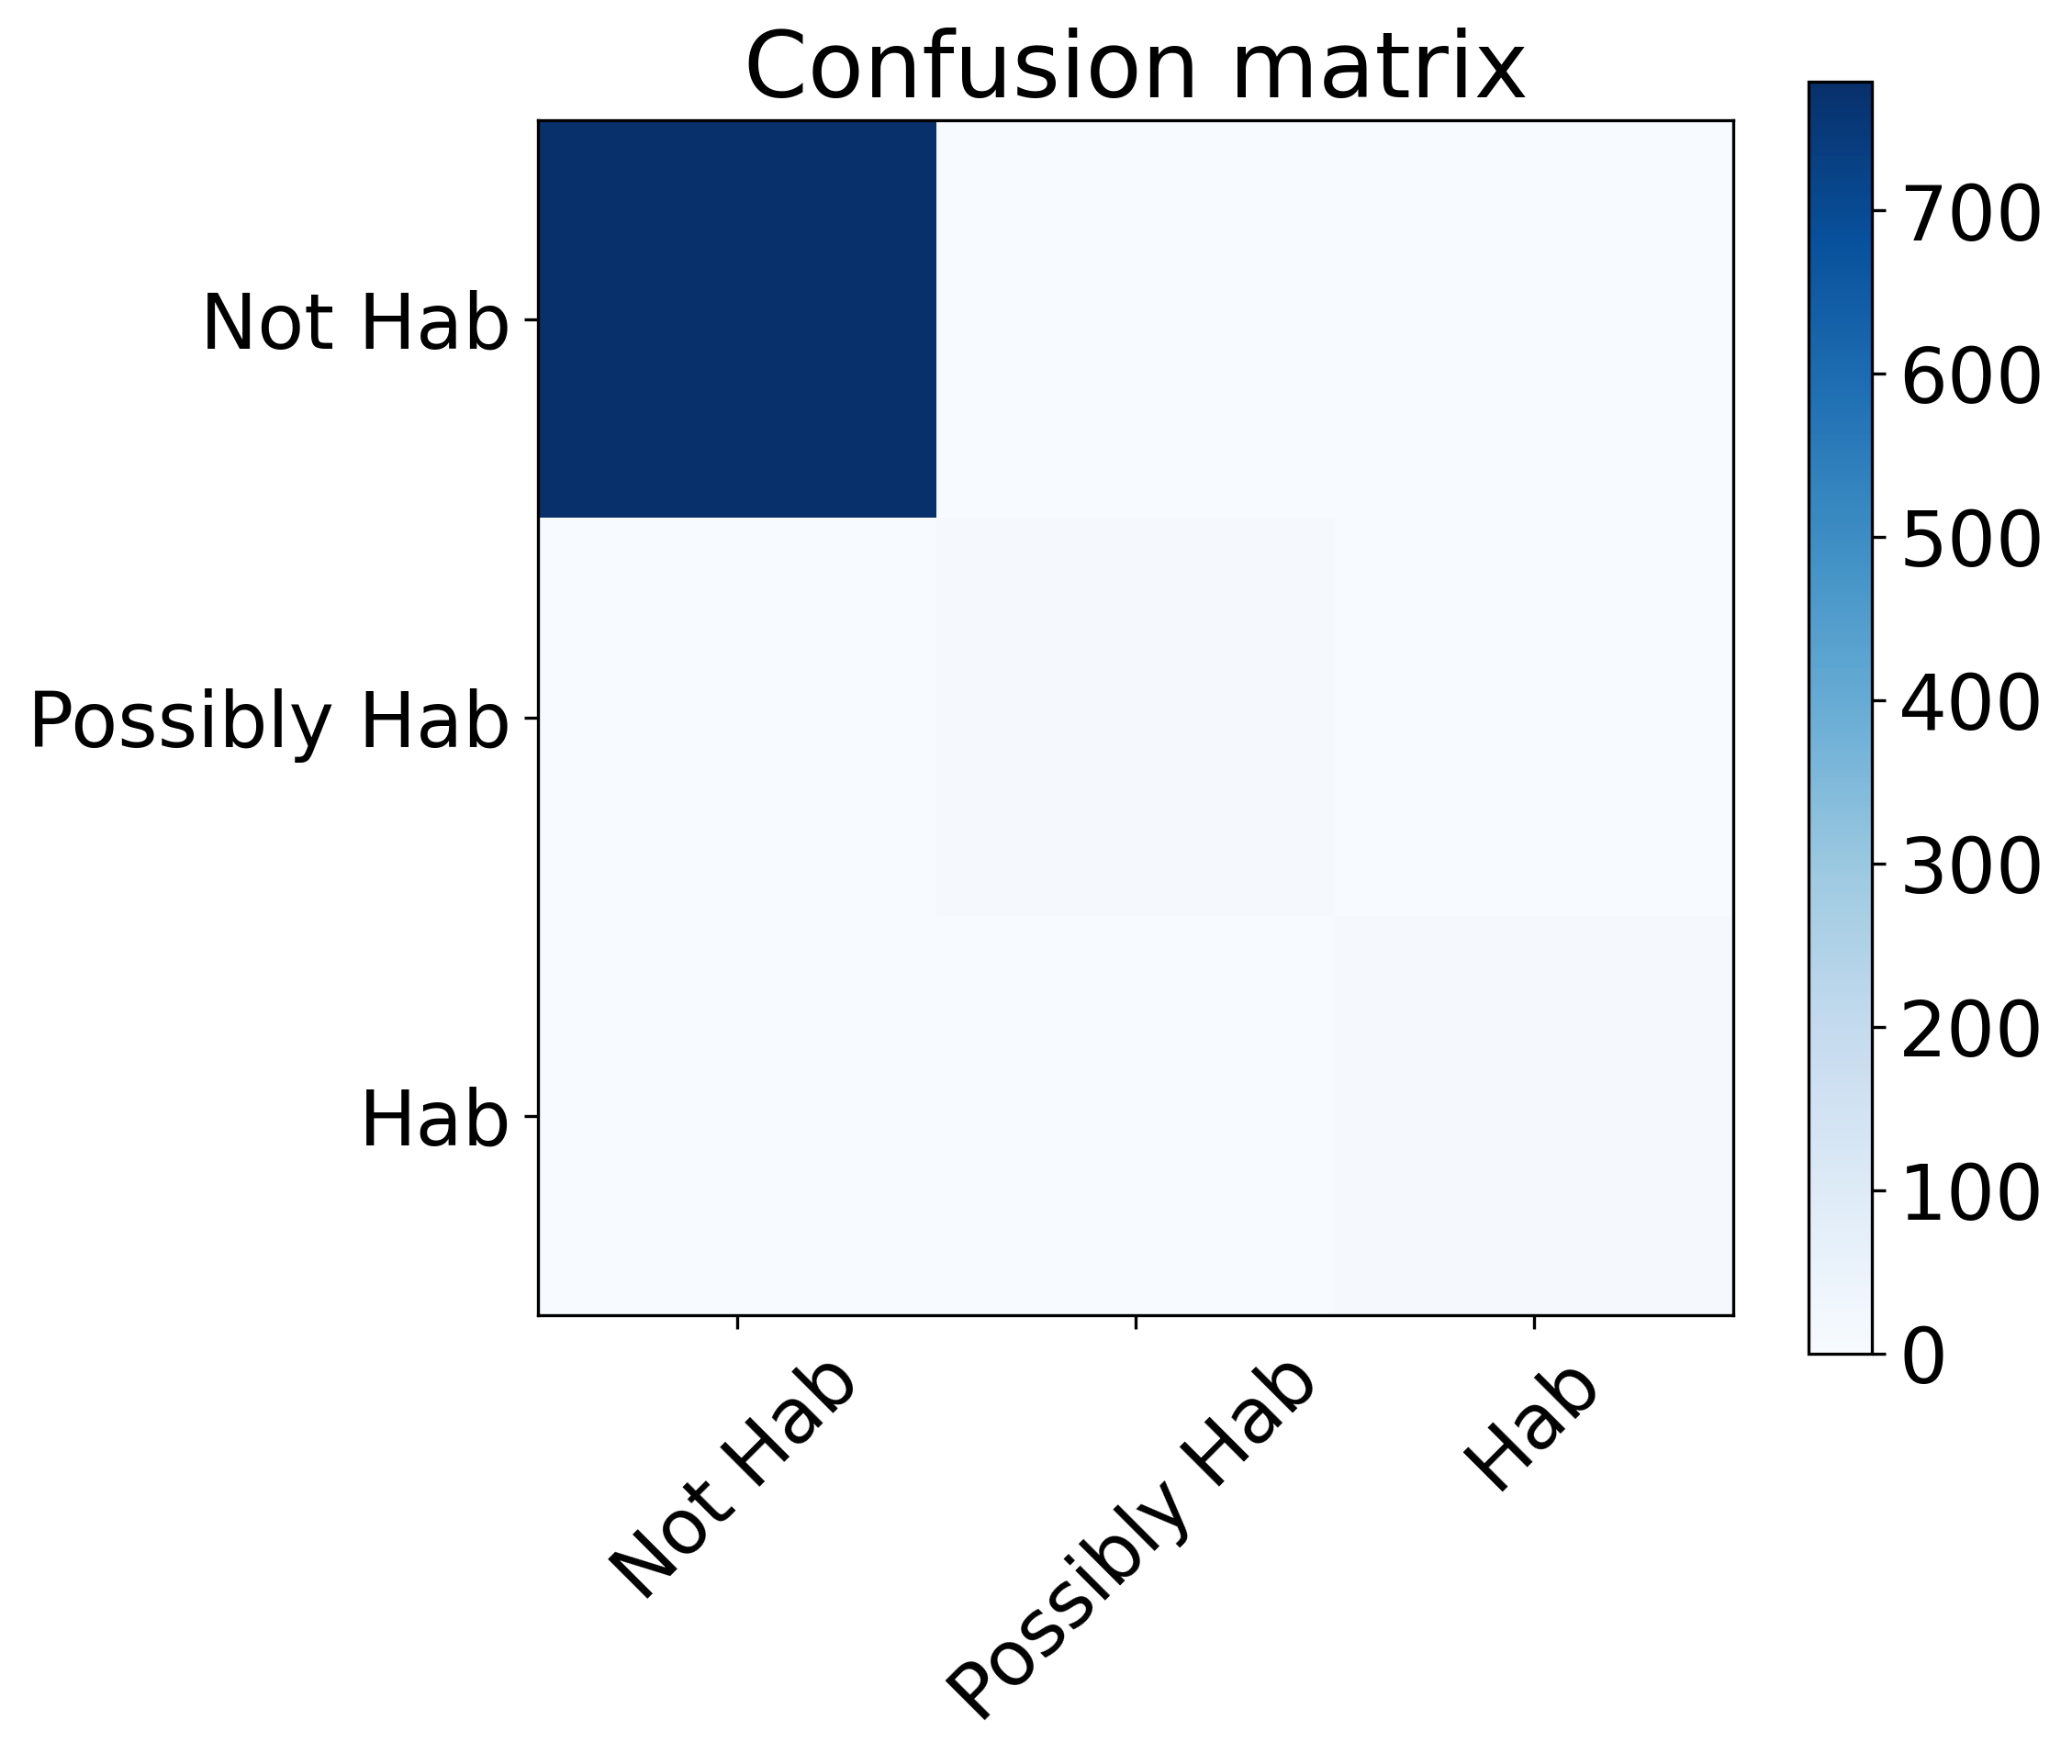

In [549]:
model = DecisionTreeClassifier(random_state=4)
model.fit(Xtrain, ytrain)
cm = metrics.confusion_matrix(ytest,model.predict(Xtest))

# cm
plot_confusion_matrix(cm, ['Not Hab', 'Possibly Hab', 'Hab'], cmap = plt.cm.Blues)

#### 2. The "classification report" attribute allows you to calculate the precision and recall scores for each of the 3 classes.    
#### Would you recommend macro averaging or micro averaging? (look up how those are different).

- The difference between macro and micro averaging is that macro averaging gives equal weight to each category while micro averaging gives equal weight to each sample. If we have the same number of samples for each class, both macro and micro will provide the same score. (GOOGLE)

-  I would suggest to use micro-averaging because it will aggregate the contributed for all classses to compute the average performance whereas macro-averaging will do each class independently before averaging.

- micro dominates majority class for precision and recall
- macro are sepereate for inbalance set